In [ ]:
import numpy as np
import matplotlib.pyplot as plt

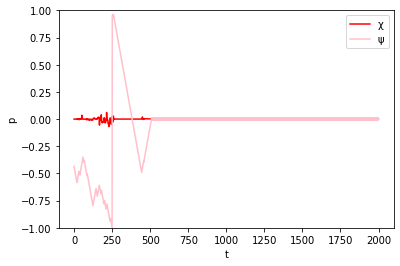

In [ ]:
I_n = 1 #input neuron
H_n = 5 #hidden neuron
O_n = 1 #output neuron
n_nodes = I_n  + H_n + O_n
weights = [[0 for i in range(n_nodes)]for j in range(n_nodes)] #initialize an empty weight matrix
p = 0.1 #edge formation probability
s = 0.1 #range in which weights are initialized
learning_rate = 0.05



out = [] #record of χ
inn = [] #record of ψ
weightsrecord = []
a = 0 
steps = 2000 #number of iterations
dt =1 #iteration timestep
iterations = np.arange(0, steps, dt) #initialize iterations array

y = np.zeros((n_nodes, len(iterations))) #initialize y with 0s


weightsrecord.append(sum([sum(weights[i]) for i in range(len(weights))])) #first entry of weightrecord.
for t in np.arange(1, len(iterations)): #for each iteration


#####################GAME
    inp = y[:, t-1][0] #game's output, network's input ψ
    inn.append(inp)
    if a != 0 and a != 255: #if A is not touching the walls the walls
      if inp <= 0: 
        b = -1
      if inp>0:
        b = 1
      a+=b #move according to A's output
    else:
      a = np.random.randint(0,255) #else teleport A to a random location
      b = np.random.choice((-1,1))
    out.append((a/255)*2-1)
    y[:, t-1][n_nodes-1] = (a/255)*2-1 #game's input, network's output χ
#########################

    # update activations
    delta = np.tanh(weights @ y[:, t-1])#change in neural activity. 
    y[:, t] = dt * (delta) #add change in neural activity for each neuron

    weightsrecord.append(sum([sum(weights[i]) for i in range(len(weights))])) #total sum of weights in the network
    for i in range(len(weights[0])): #for each weight in the network
      for j in range(len(weights)): 


        #hebb
        if weights[i][j] != 0: #if the weight exists
          weights[i][j] += y[:, t][i]*y[:, t-1][j]*learning_rate #apply hebb. activity is compared to afferent neurons's activity in the past, to respect causality
          weights[i][j] = np.tanh(weights[i][j])#normalize weight

        if t>0 and t<=100: #for the first 100 iterations
            if weights[i][j] == 0 and np.random.rand() < p:#will generate an edge with some probability p, going from most active neuron to least active neuron 
              if y[:, t][i] > y[:, t-1][j]:
                weights[i][j] = np.random.uniform(-1,1)*s 

              if y[:, t][i] < y[:, t-1][j]:
                weights[j][i] = np.random.uniform(-1,1)*s

            if weights[i][j] > -0.1 and weights[i][j] < 0.1 and np.random.rand() < p:#will delete an edge with some probability p 
                weights[i][j] = 0
        
        if t>100: #prevent weights deviating from 0
          if abs(weightsrecord[t]) > abs(weightsrecord[t-1]):
            if weights[i][j] == 0 and np.random.rand() < p:
              if y[:, t][i] > y[:, t-1][j]:
                weights[i][j] = np.random.uniform(-1,1)*s

              if y[:, t][i] < y[:, t-1][j]:
                weights[j][i] = np.random.uniform(-1,1)*s 

            if weights[i][j] > -0.1 and weights[i][j] < 0.1 and np.random.rand() < p:
                #pass
                weights[i][j] = 0
        

        #formatting
        if weights[j][i] != 0 or i == j: #keep network directed, remove self loops, prevent inputs from connecting to outputs
          weights[i][j] = 0
        if j < I_n: 
          weights[i][j] = 0
        if i >= I_n+H_n:
          weights[i][j] = 0
        if j >= I_n+H_n and i < I_n:
          weights[i][j] = 0
        if j < I_n and i >= I_n+H_n:
          weights[i][j] = 0



# plot

_, ax = plt.subplots(1, 1)

plt.ylim([-1,1])
plt.ylabel('p')
plt.xlabel('t')
a, = ax.plot(iterations, y[0, :],'r')
b, =ax.plot(iterations, y[n_nodes-1, :],'pink')
plt.legend([a,b],['χ', 'ψ'])
plt.show()    

In [ ]:
#calculating entropy
entropyin1 = [round(i,6) for i in inn] #rounding in order to discredize χ and ψ
entropyout1 = [round(i,6) for i in out] 
ran = 500 #running average window
entropyinT1 = [entropyin1[i:(i+ran)] for i in range(len(entropyin1)-ran)]
entropyoutT1 = [entropyout1[i:(i+ran)] for i in range(len(entropyout1)-ran)]
time = np.linspace(0,steps, len(entropyout1)-ran)

In [ ]:
for n,i in enumerate(entropyinT1): #calculate entropy on time-series
  import pandas as pd
  from scipy.stats import entropy
  data = i

  pd_series = pd.Series(data)
  counts = pd_series.value_counts()
  entropy = entropy(counts)
  entropyinT1[n] = entropy

for n,i in enumerate(entropyoutT1):
  import pandas as pd
  from scipy.stats import entropy
  data = i

  pd_series = pd.Series(data)
  counts = pd_series.value_counts()
  entropy = entropy(counts)
  entropyoutT1[n] = entropy



Text(0.5, 0, 't')

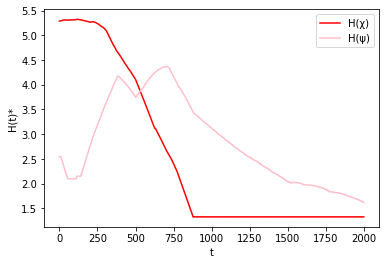

In [ ]:
a, = plt.plot(time,entropyoutT1,'red')
b, = plt.plot(time,entropyinT1,'pink')
plt.legend([a,b],['H(χ)','H(ψ)'])
plt.ylabel('H(t)*')
plt.xlabel('t')

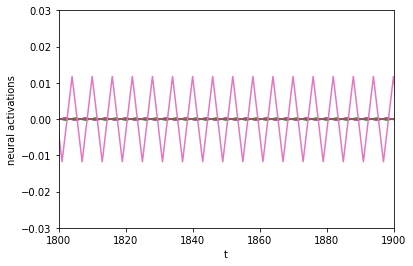

In [ ]:
#close up of A's behaviour and neural activity
_, ax = plt.subplots(1, 1)
for n in range(n_nodes):
    ax.plot(iterations, y[n, :])
plt.ylabel('neural activations')
plt.xlabel('t')
plt.ylim([-0.03,0.03])
plt.xlim([1800, 1900])
plt.show()   

ILLUSTRATIONS

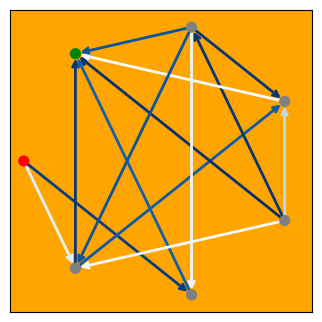

In [ ]:
#visualize network
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

#next step here is to colormap neurons to neurons in the plot 
#or possibly plot input neurons, hidden and output neurons separately
#convert weight matrix to list notation, i connects to j
connections = []
weightlist = []
for i in range(n_nodes):
  for j in range(n_nodes):
    if weights[i][j] != 0:
      connections.append((i, j)) #from i to j
      weightlist.append(weights[i][j])
#initializing
G = nx.DiGraph()
G.add_nodes_from = [i for i in range(n_nodes)]
G.add_edges_from(connections)

#plot settings
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111)
ax.set_aspect(aspect=1)
ax.set_facecolor('orange')
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)

#visual parameters
#node_sizes = [3 + 10 * i for i in range(len(G))]
node_colors = ['grey' for node in G]
node_colors[np.where(np.array(list(G.nodes)) == n_nodes-1)[0][0]] = 'green'
node_colors[0] = 'red'
pos = nx.layout.shell_layout(G)
M = G.number_of_edges()
edge_colors = [i+0.5 for i in weightlist]
#edge_alphas = 
#plot nodes and edges
nodes = nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=50,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=2,
)

# set alpha value for each edge
#for i in range(M):
    #edges[i].set_alpha(edge_alphas[i])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

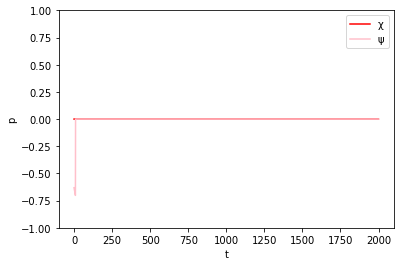

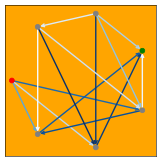

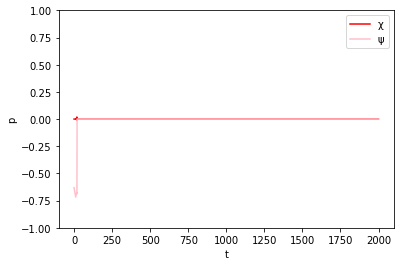

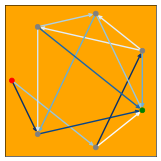

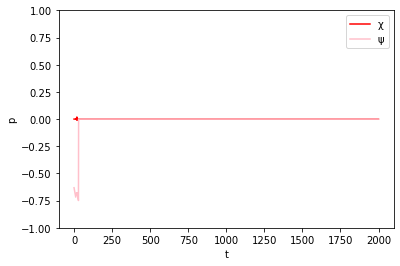

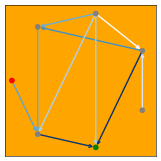

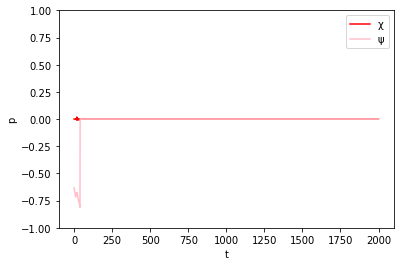

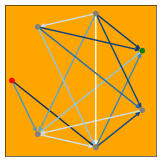

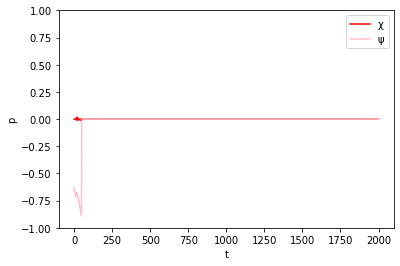

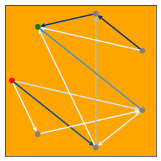

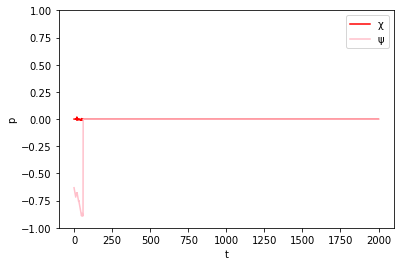

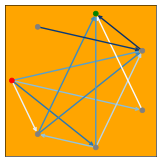

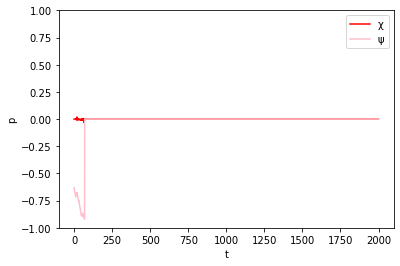

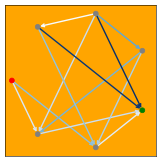

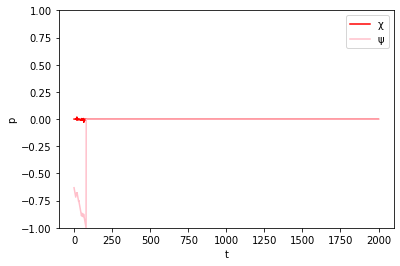

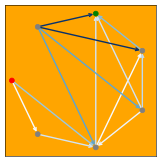

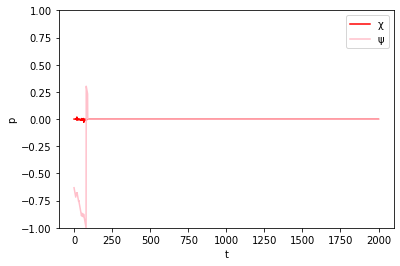

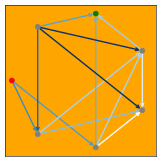

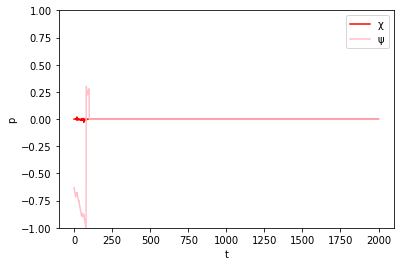

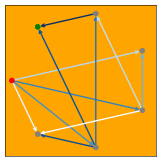

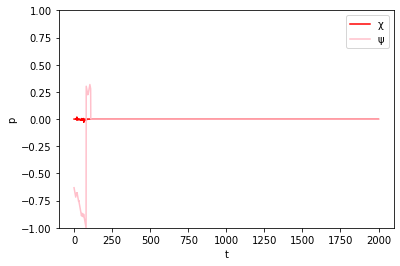

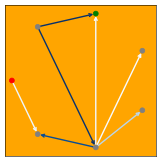

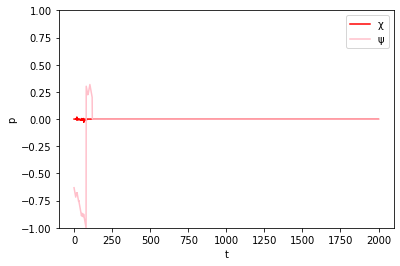

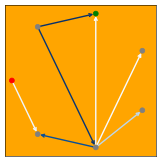

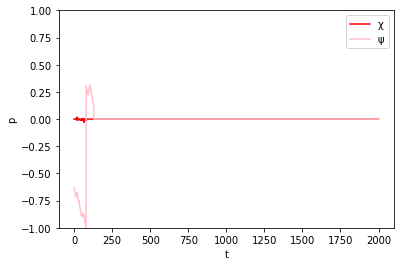

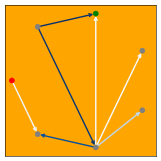

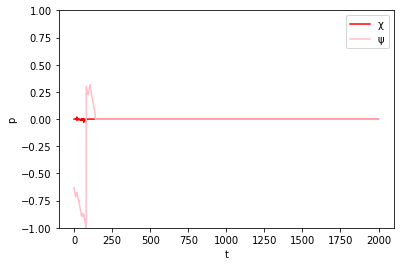

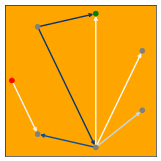

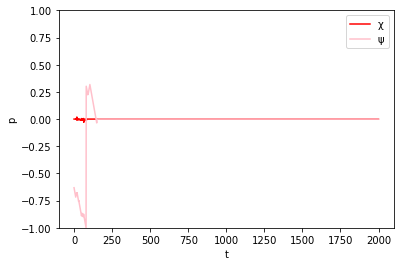

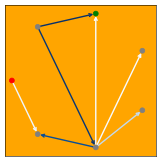

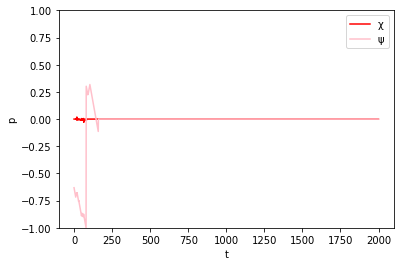

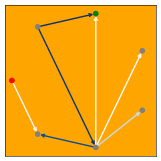

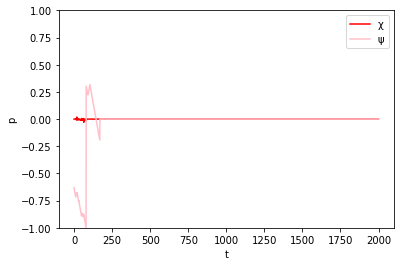

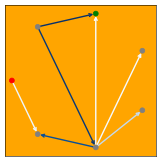

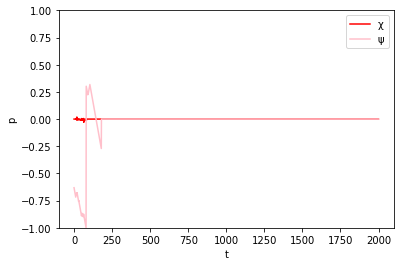

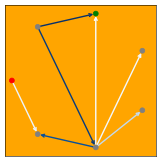

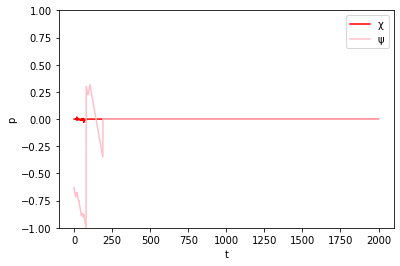

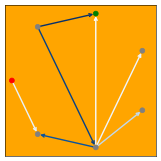

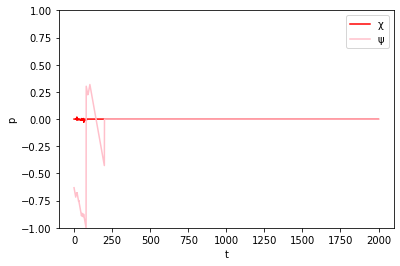

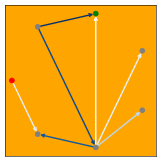

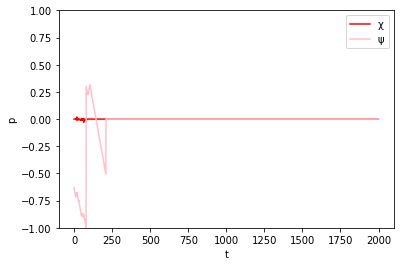

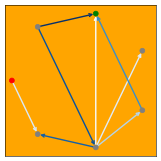

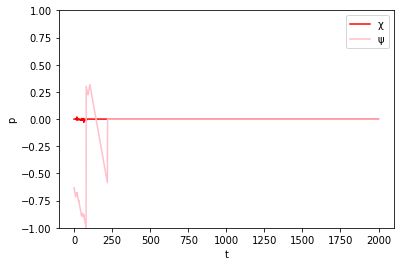

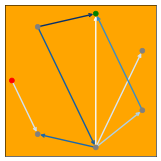

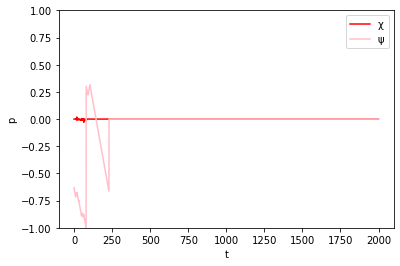

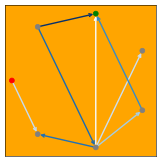

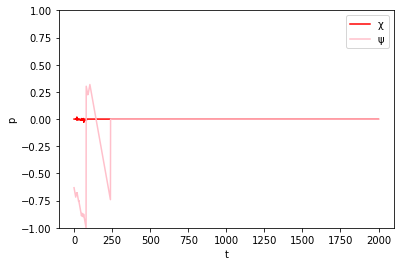

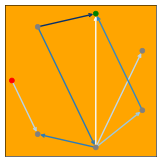

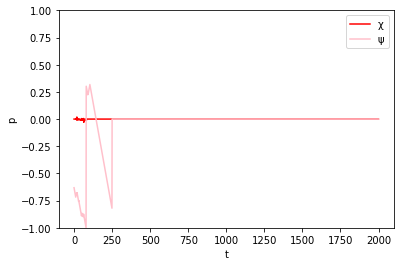

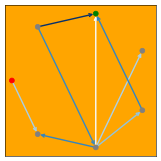

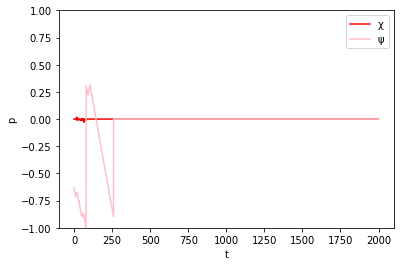

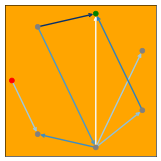

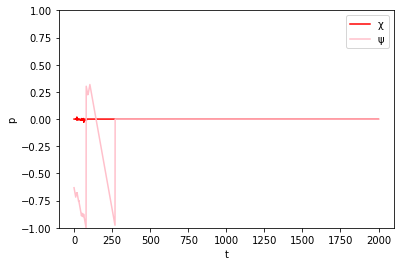

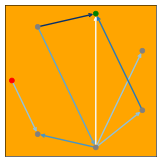

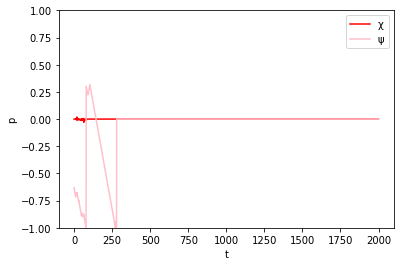

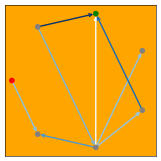

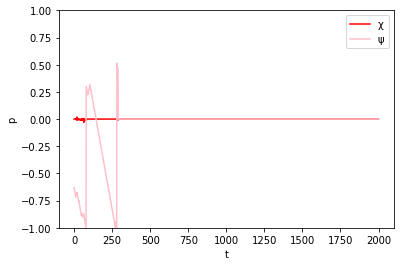

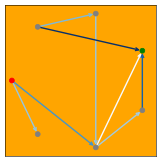

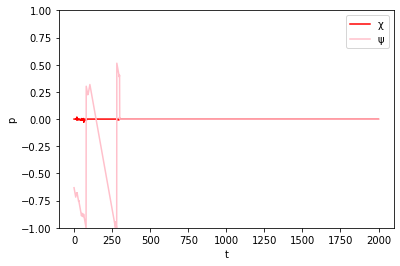

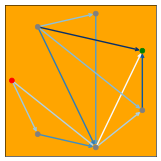

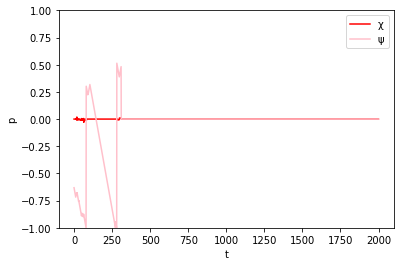

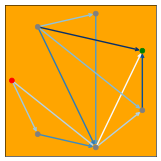

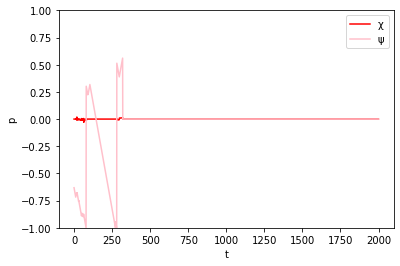

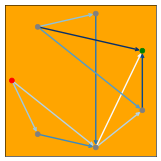

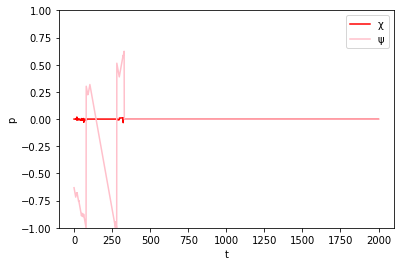

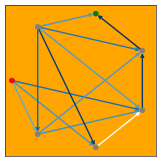

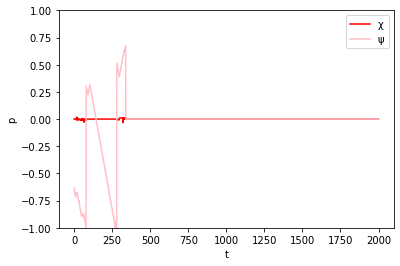

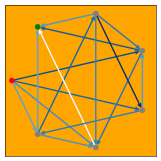

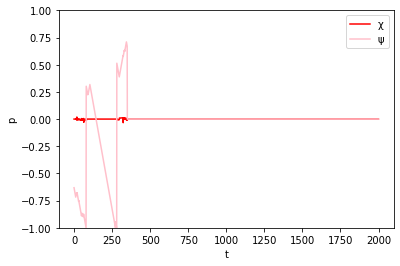

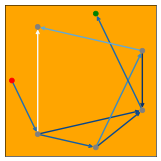

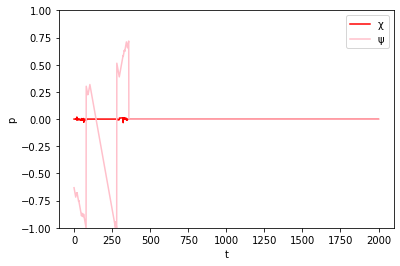

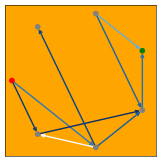

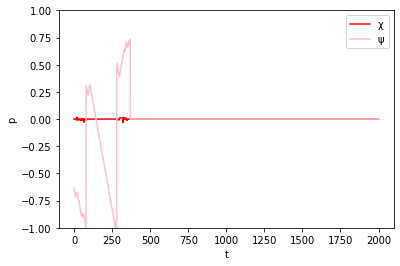

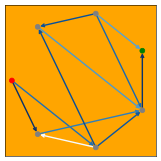

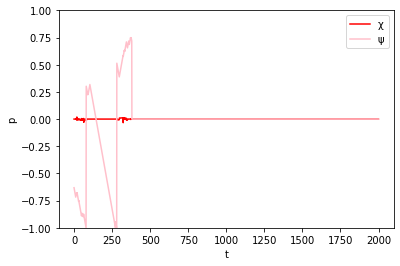

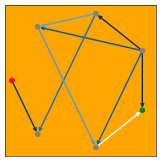

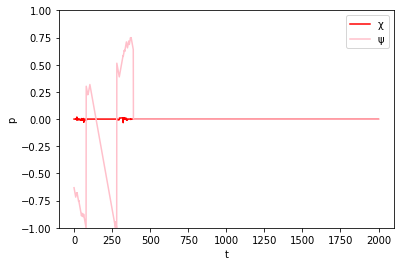

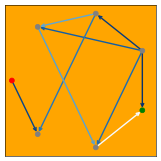

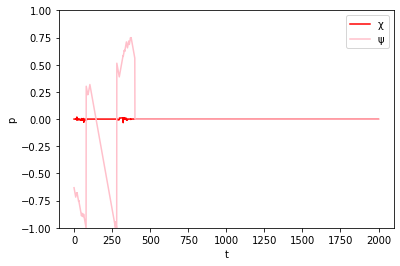

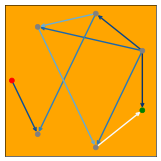

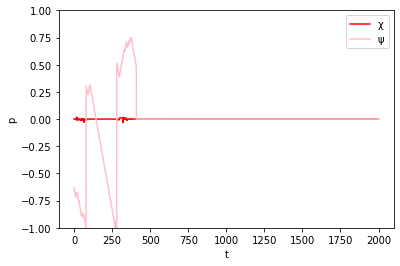

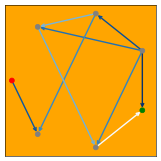

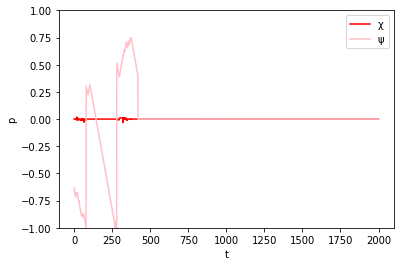

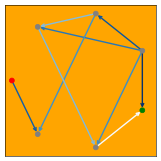

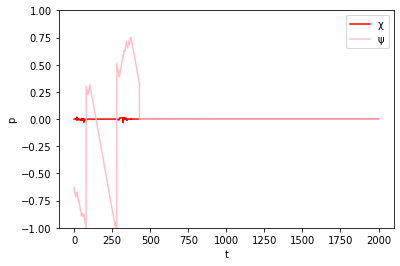

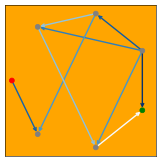

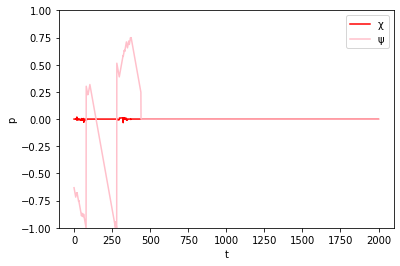

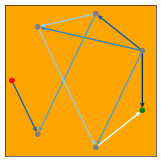

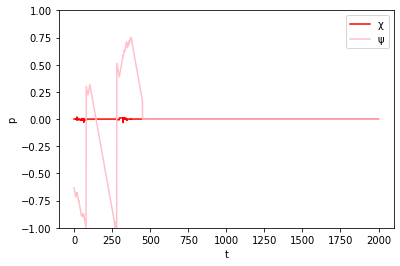

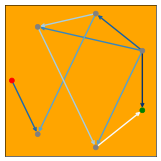

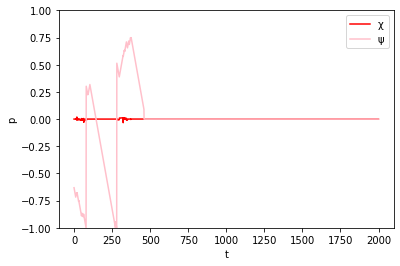

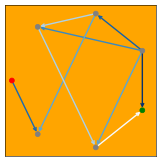

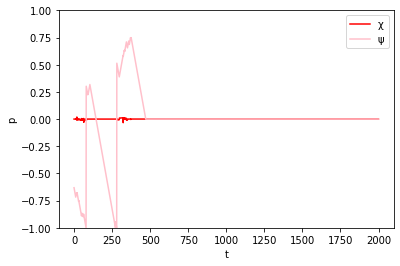

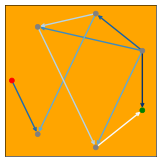

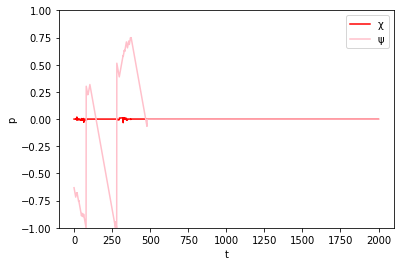

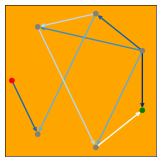

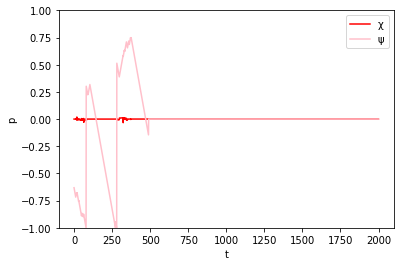

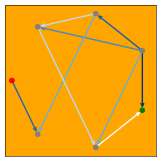

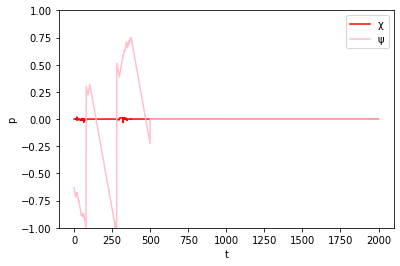

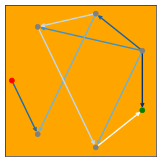

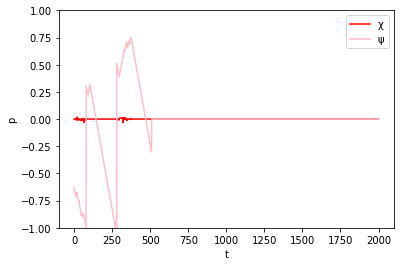

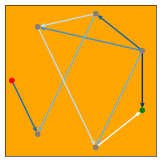

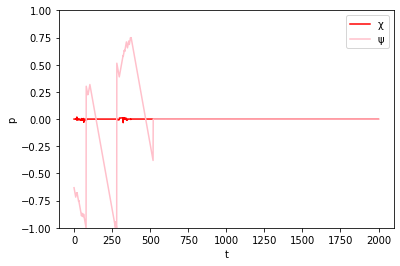

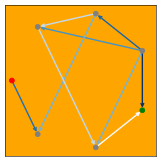

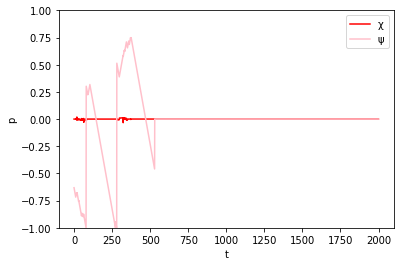

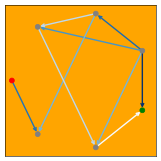

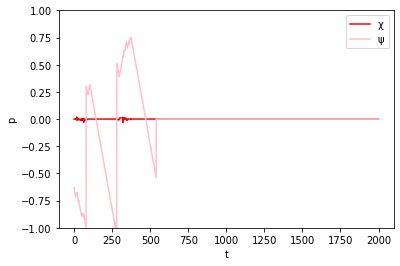

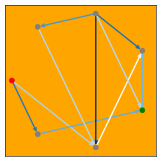

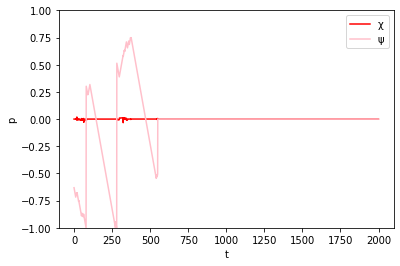

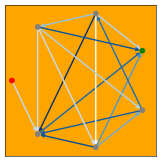

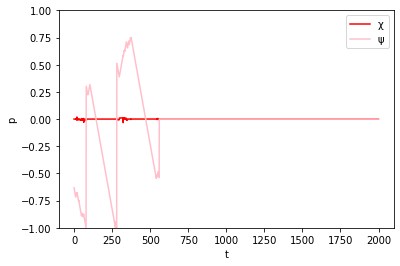

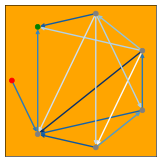

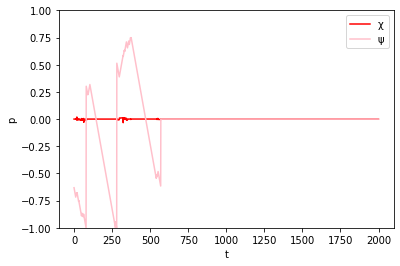

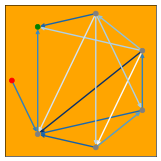

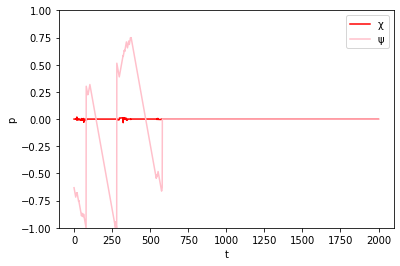

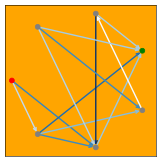

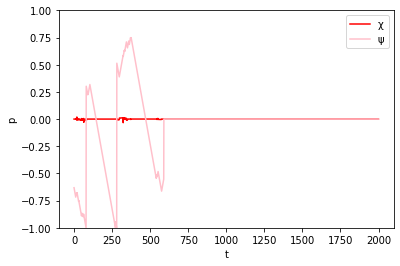

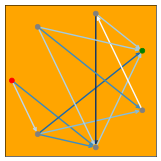

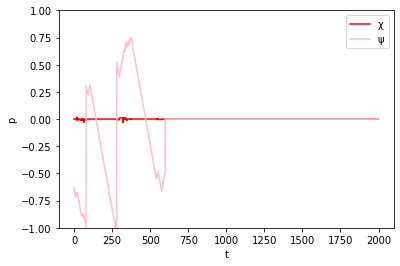

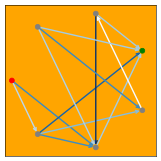

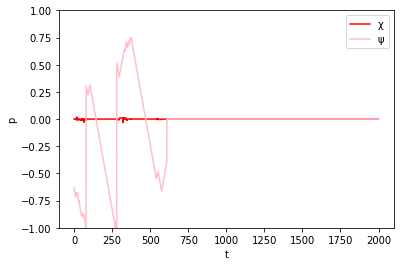

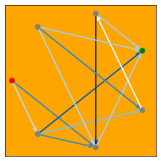

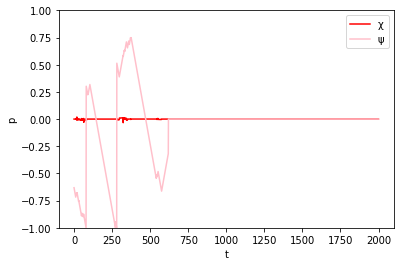

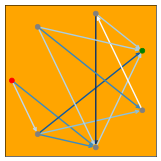

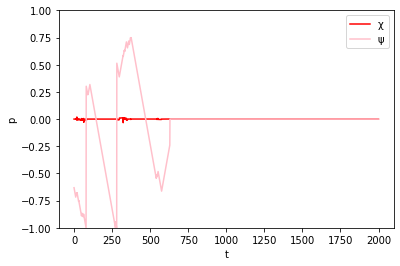

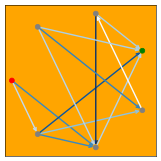

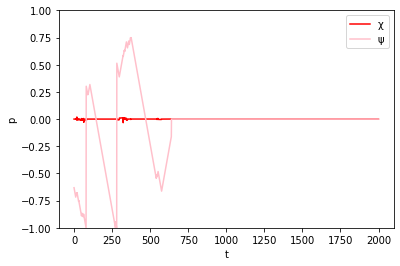

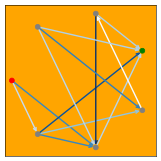

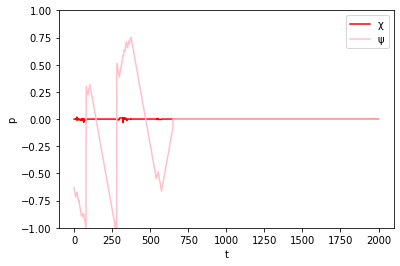

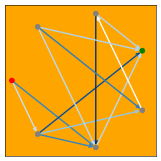

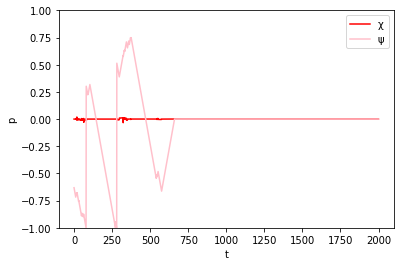

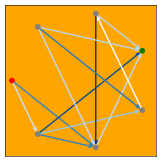

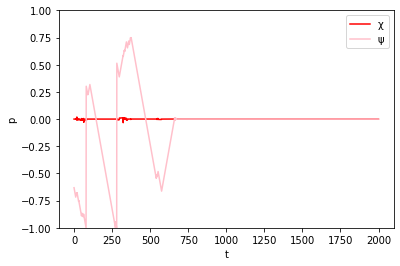

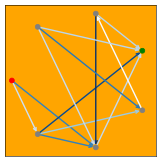

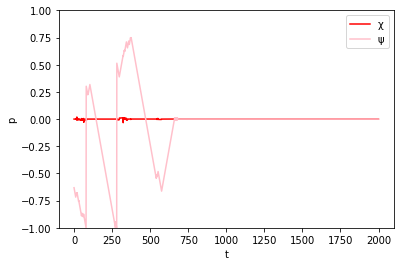

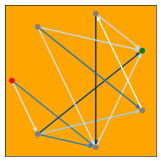

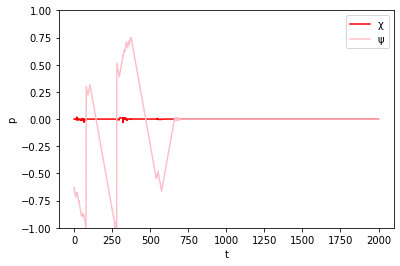

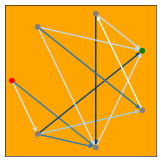

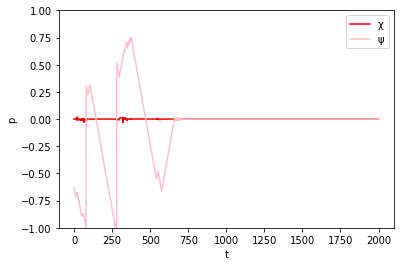

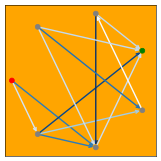

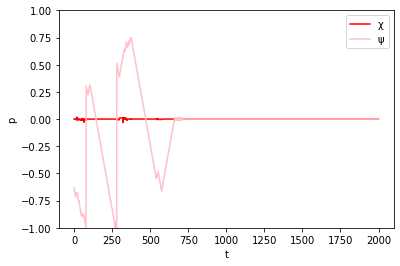

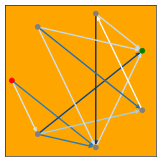

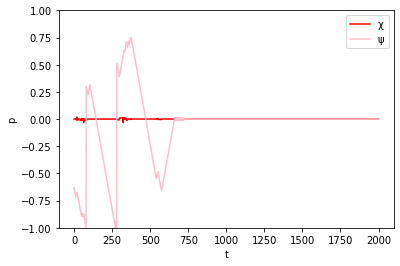

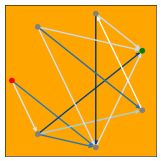

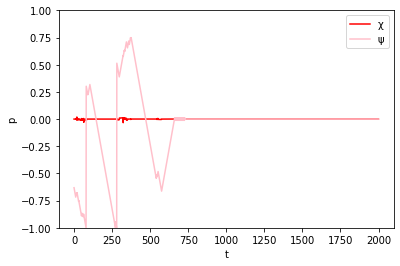

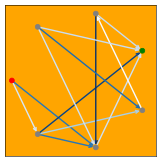

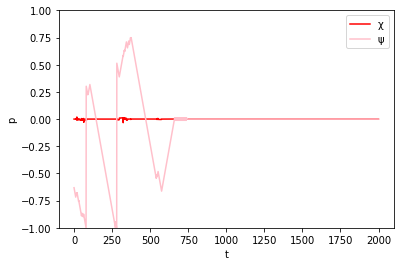

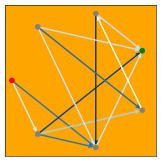

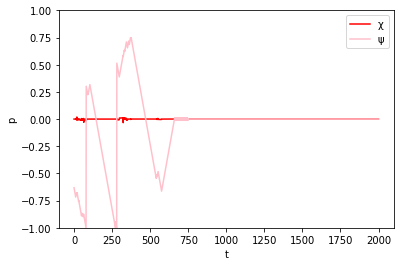

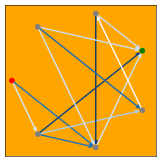

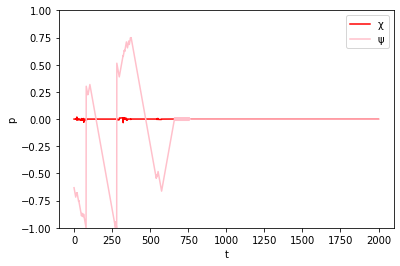

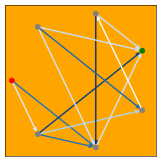

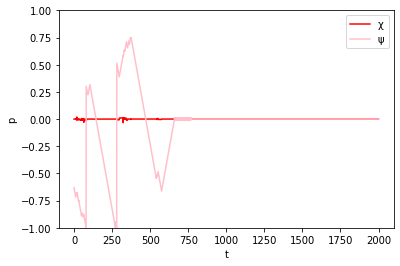

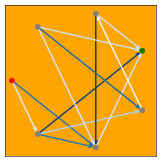

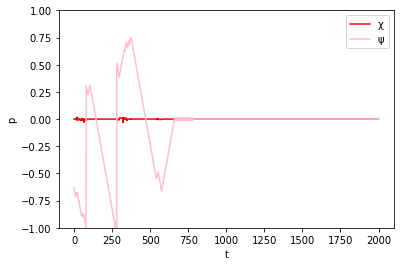

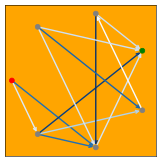

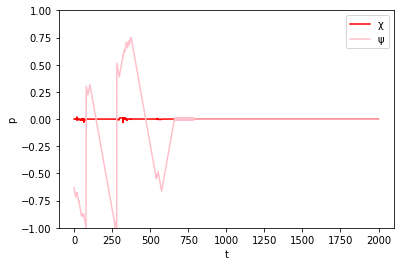

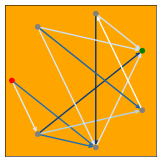

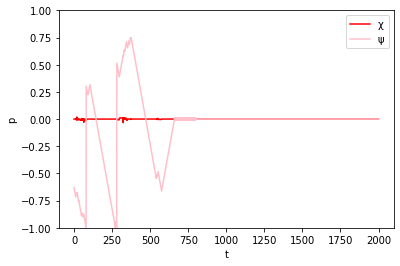

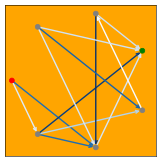

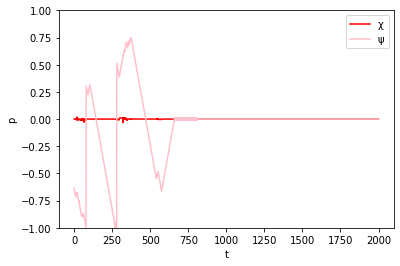

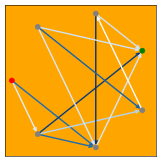

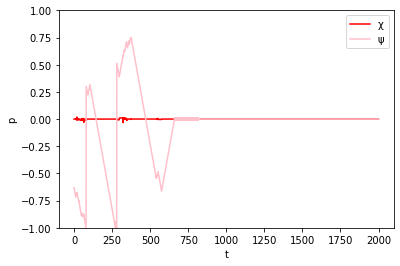

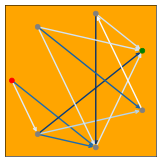

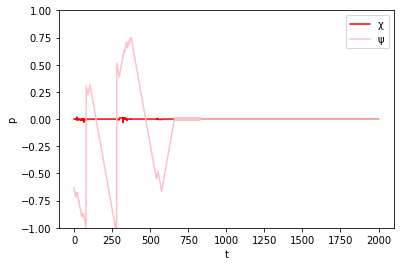

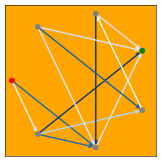

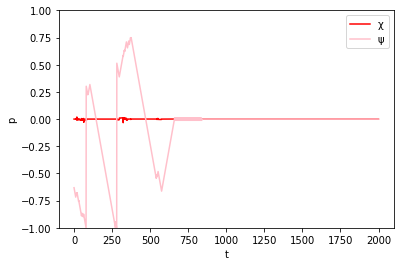

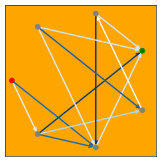

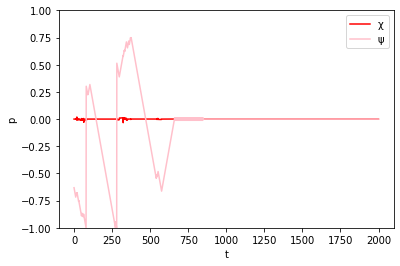

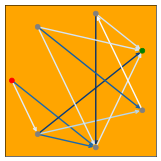

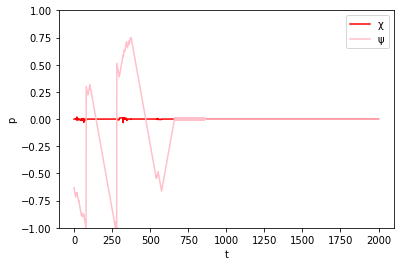

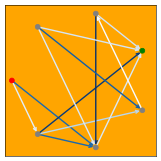

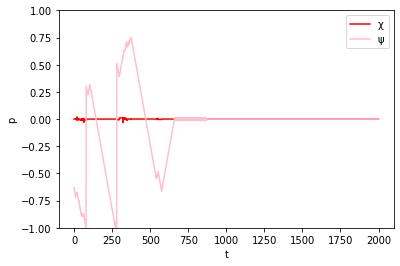

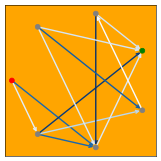

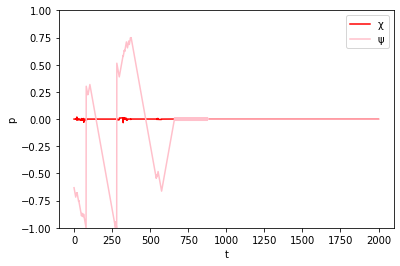

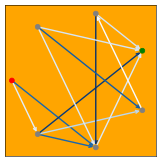

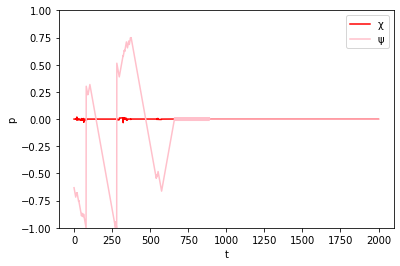

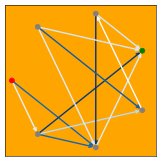

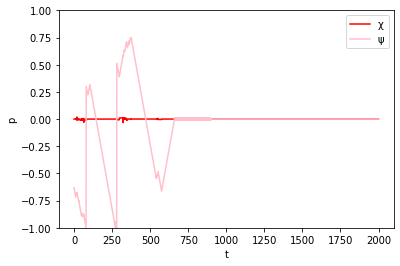

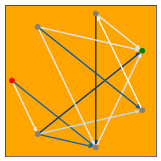

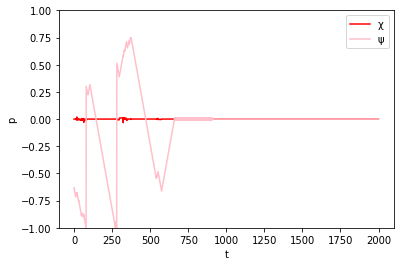

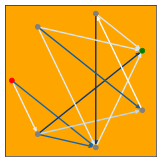

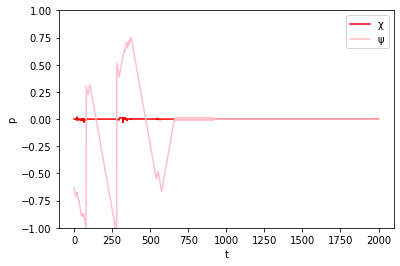

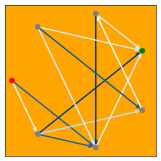

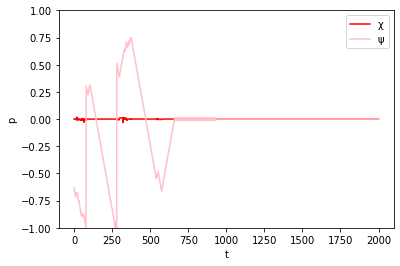

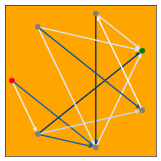

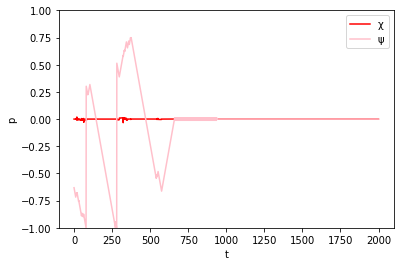

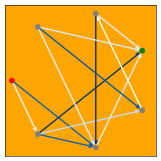

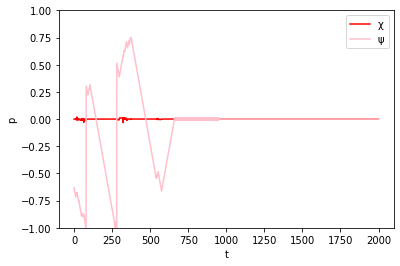

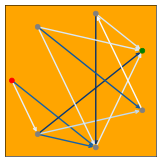

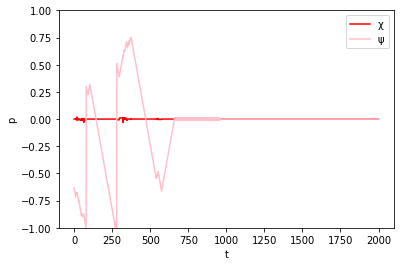

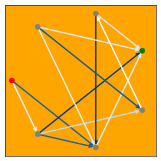

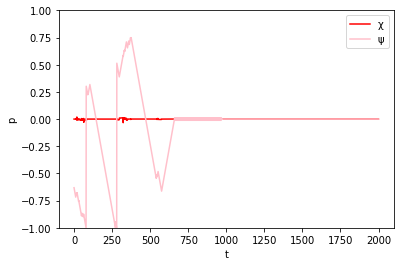

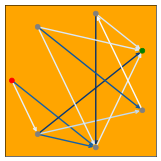

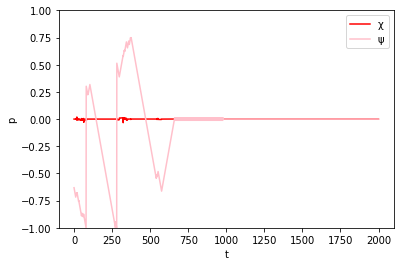

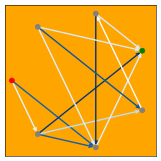

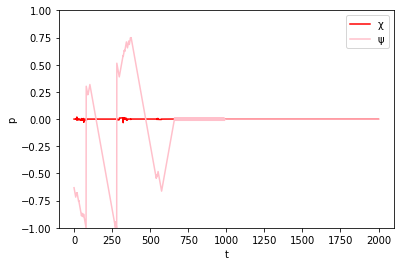

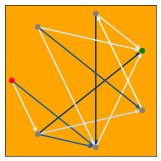

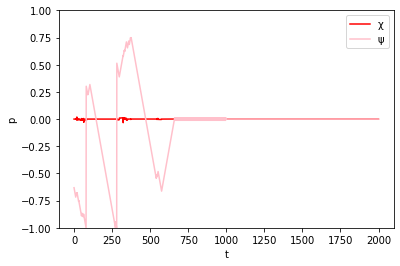

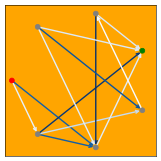

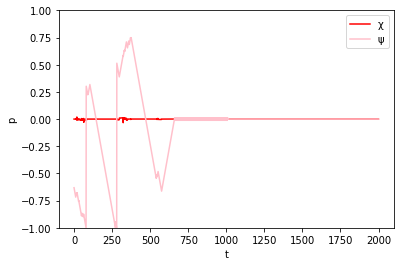

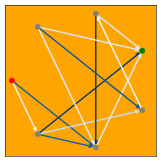

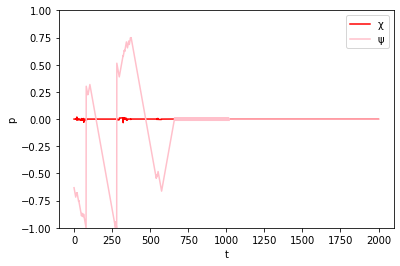

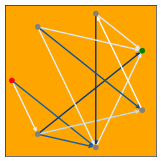

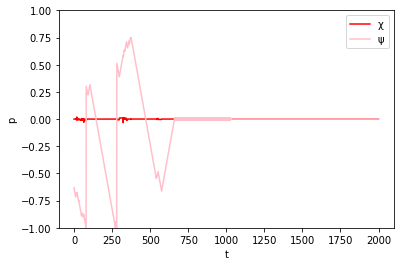

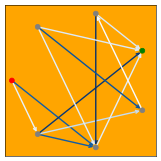

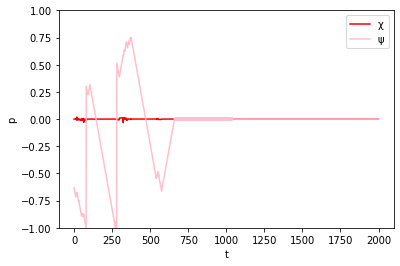

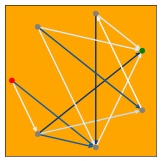

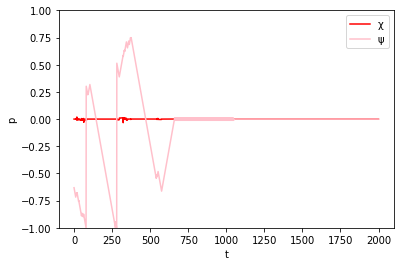

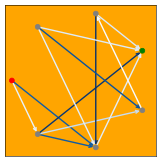

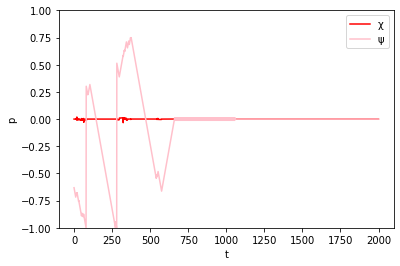

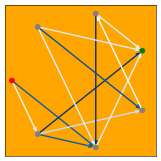

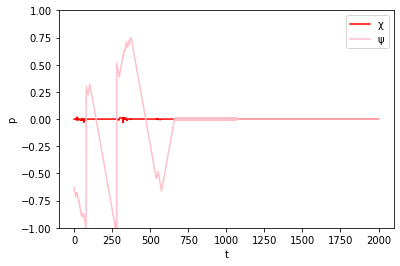

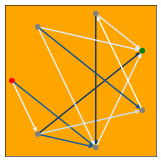

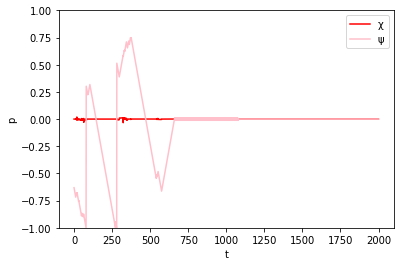

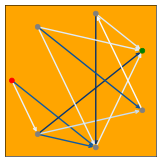

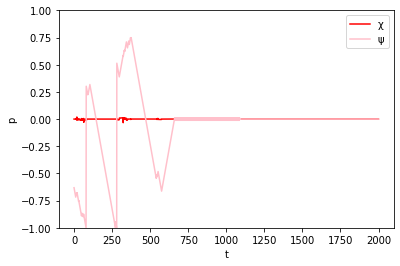

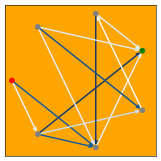

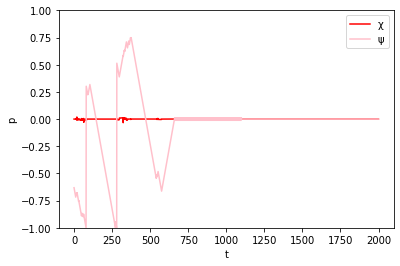

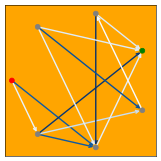

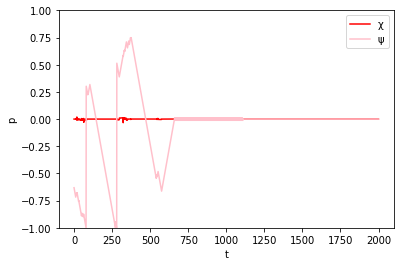

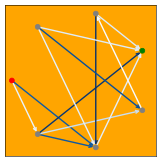

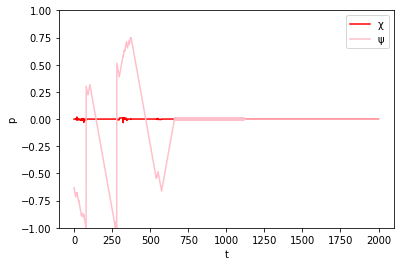

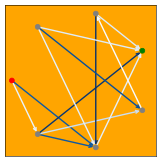

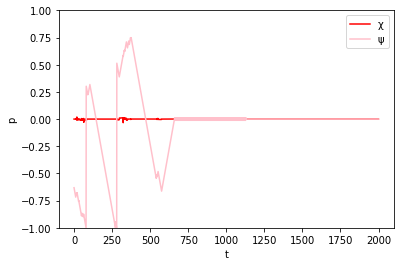

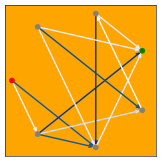

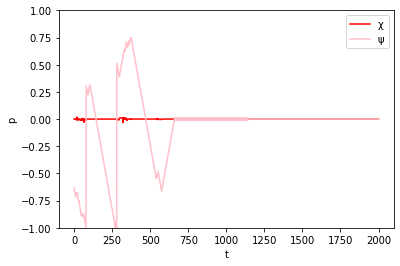

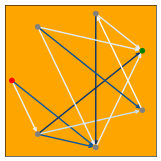

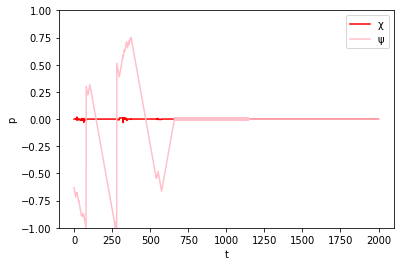

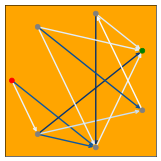

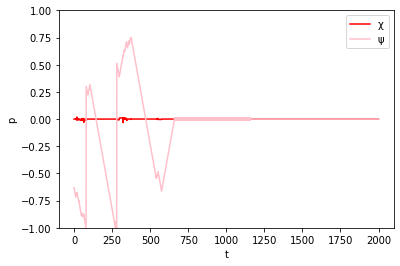

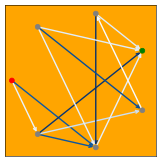

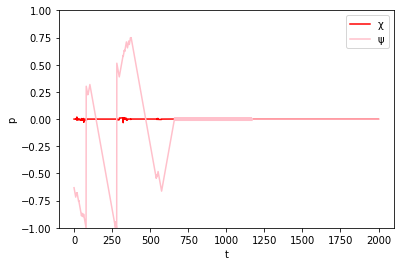

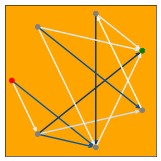

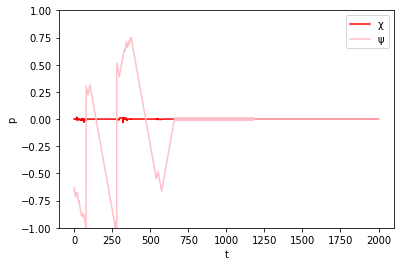

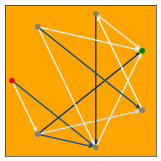

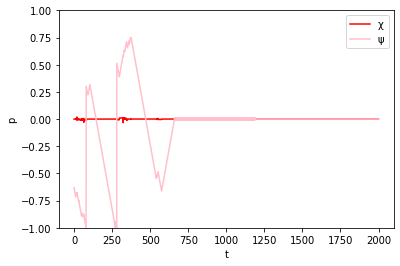

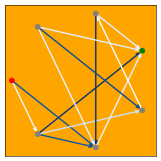

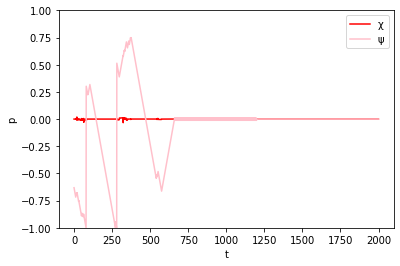

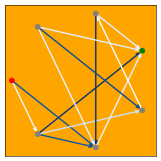

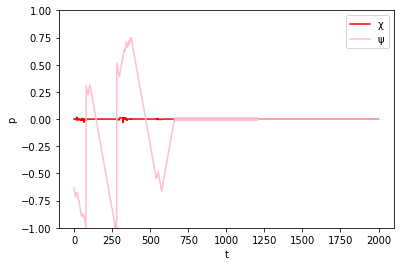

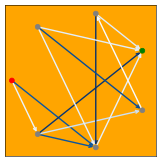

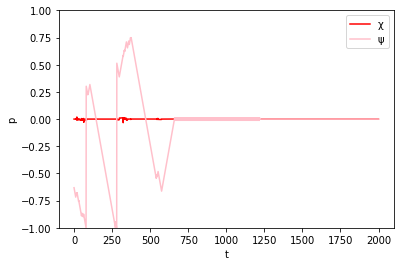

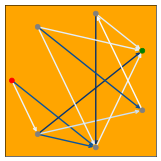

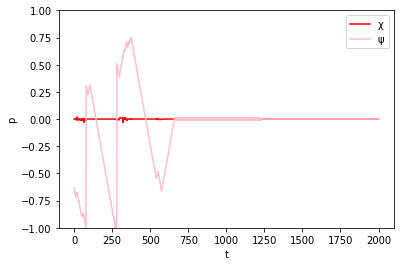

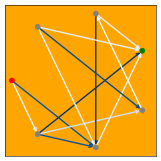

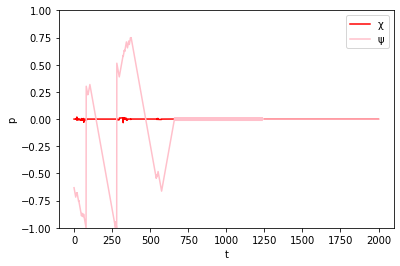

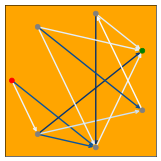

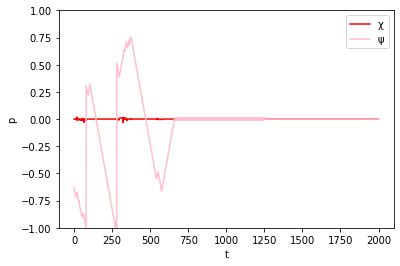

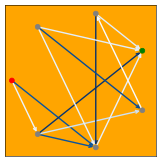

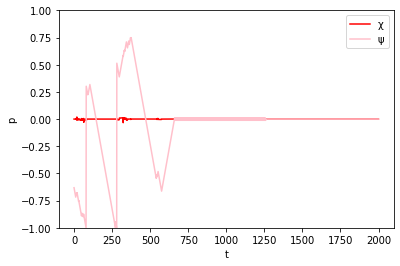

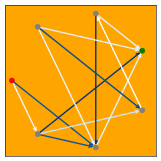

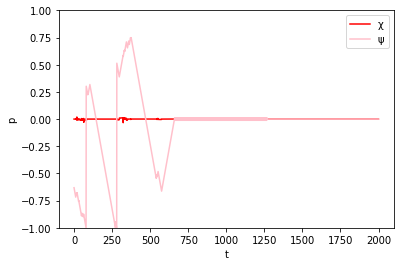

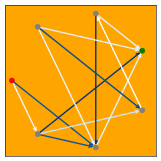

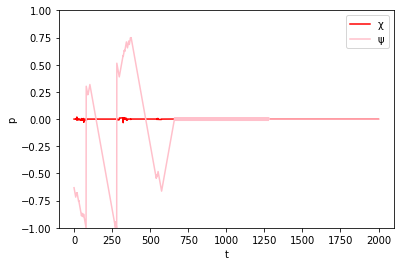

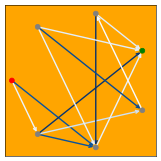

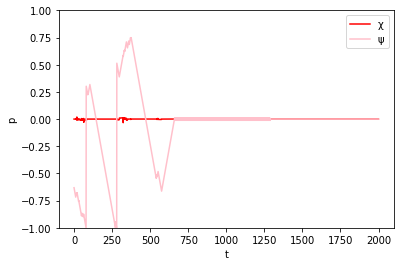

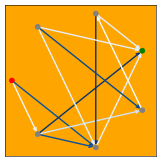

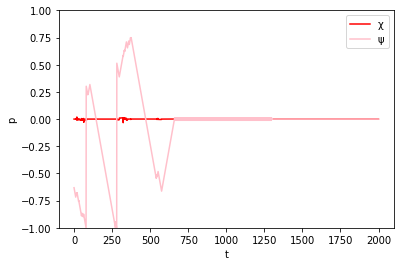

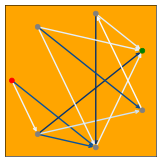

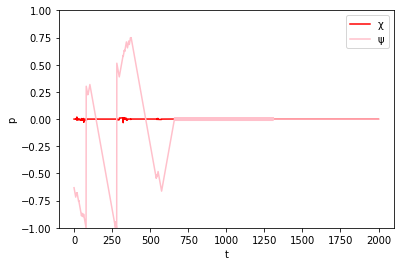

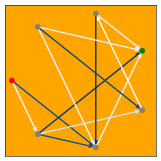

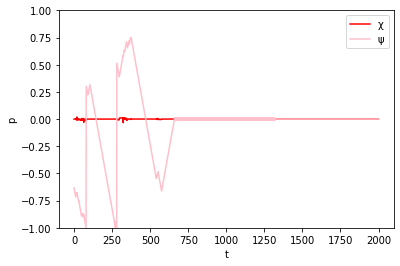

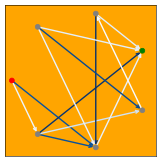

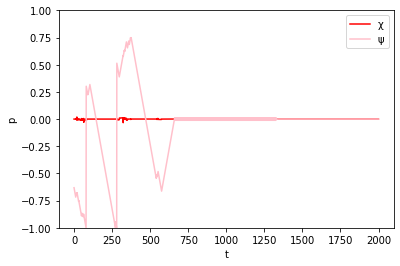

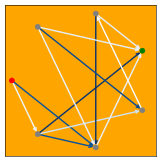

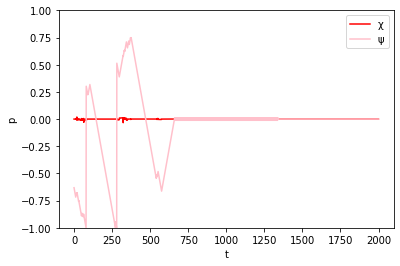

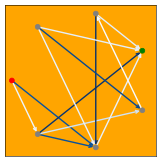

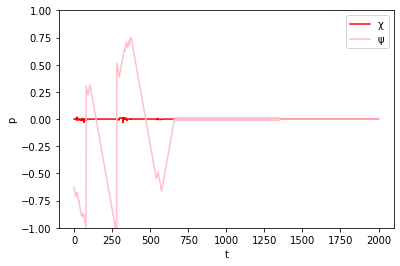

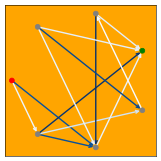

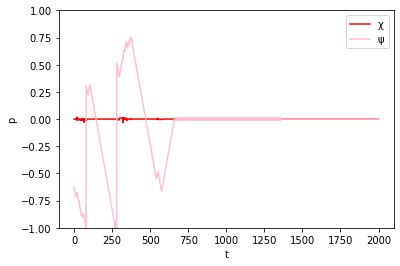

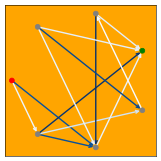

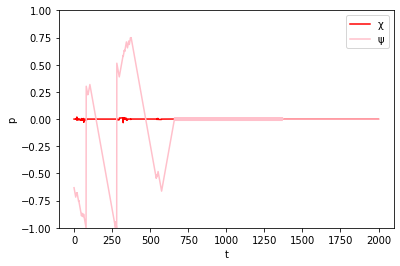

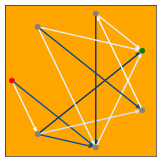

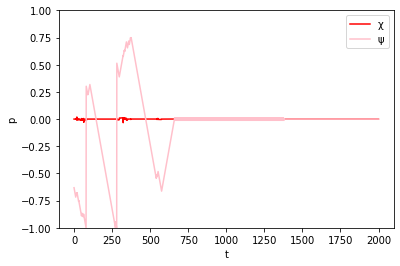

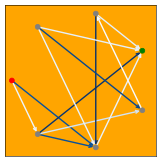

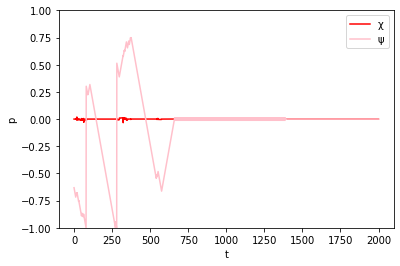

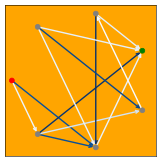

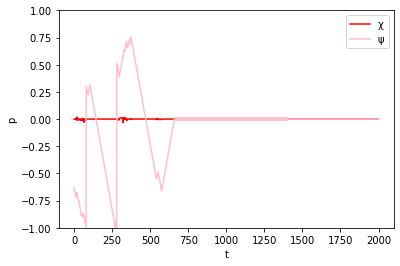

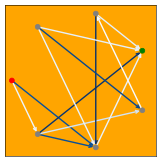

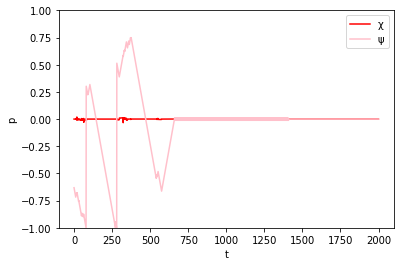

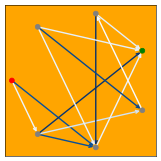

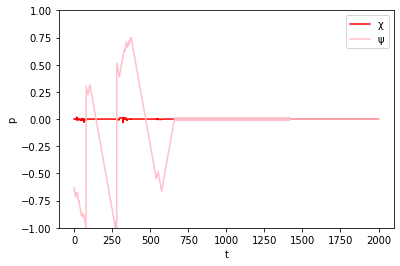

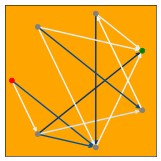

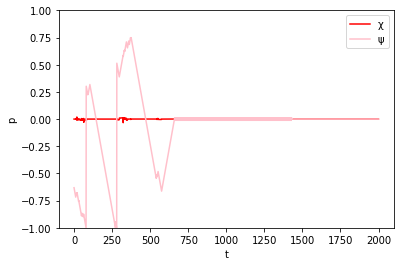

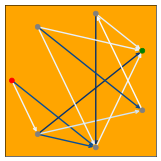

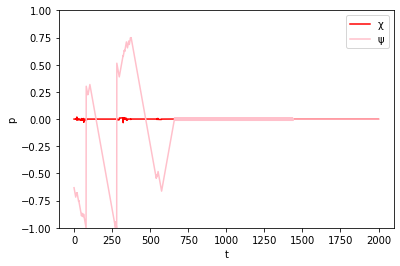

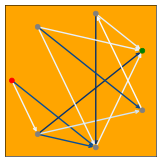

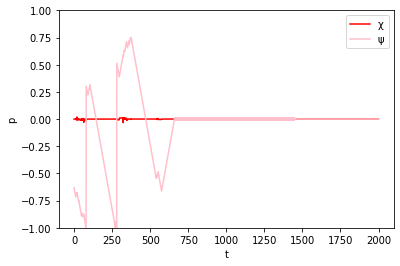

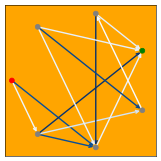

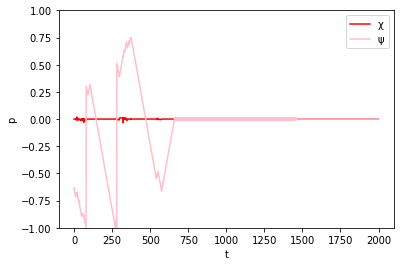

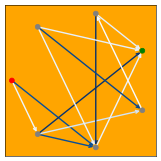

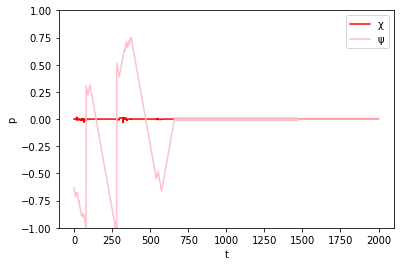

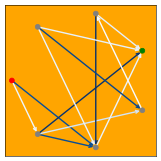

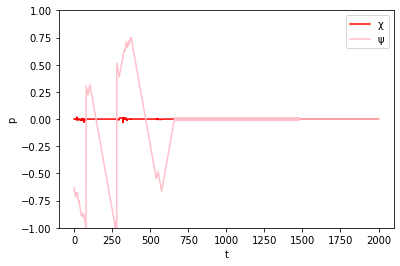

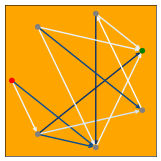

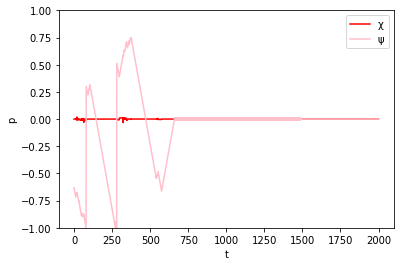

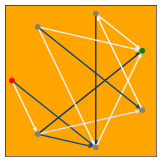

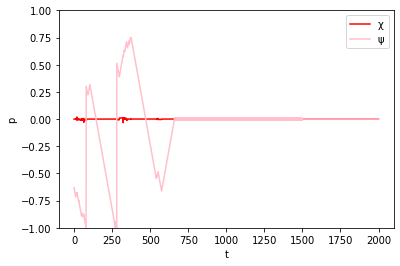

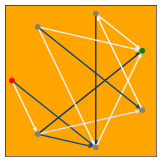

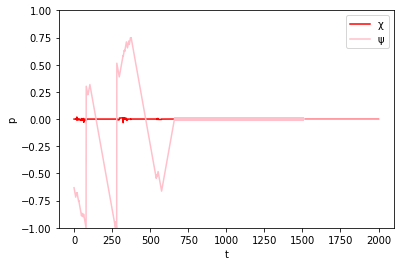

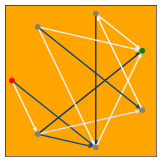

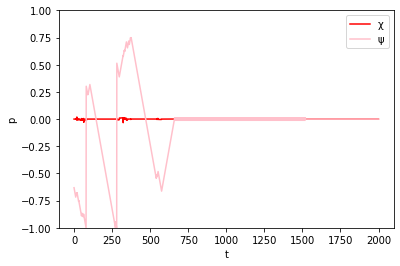

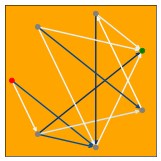

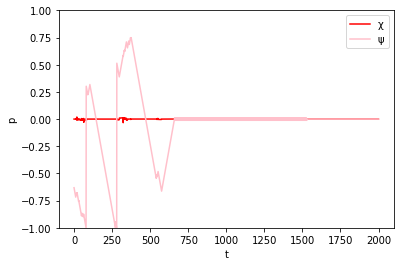

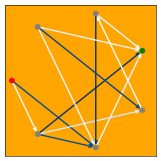

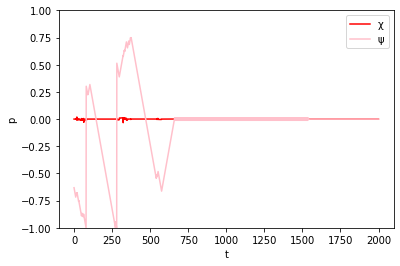

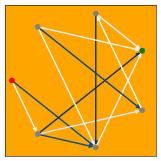

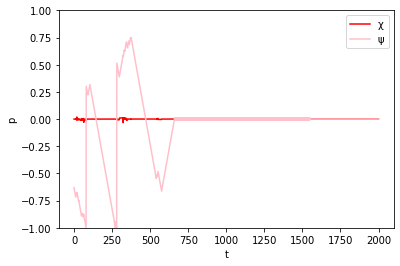

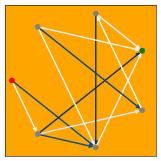

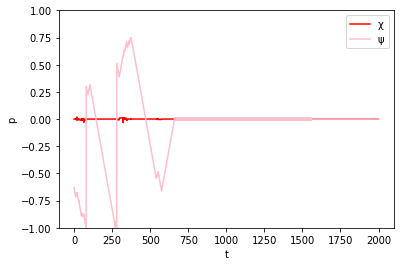

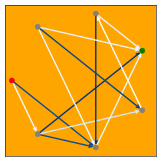

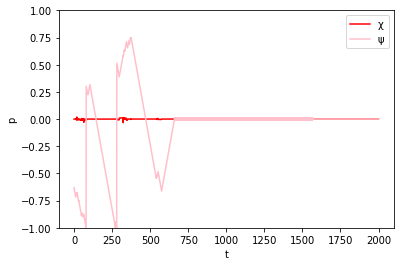

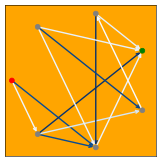

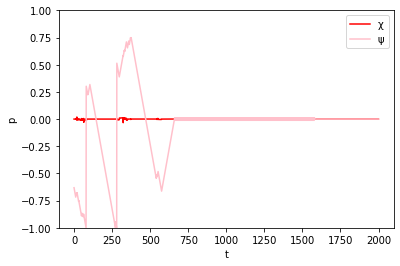

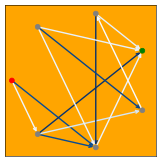

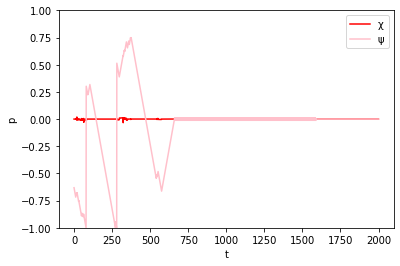

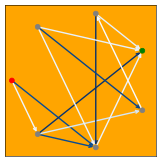

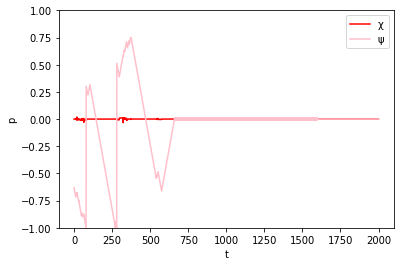

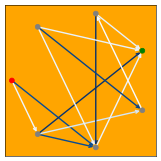

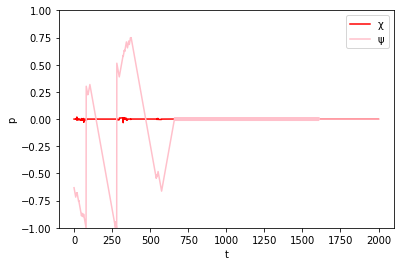

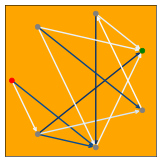

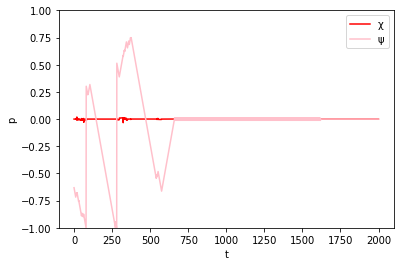

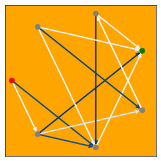

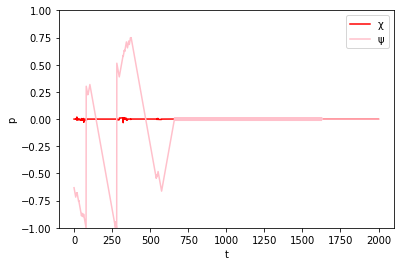

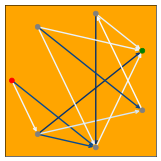

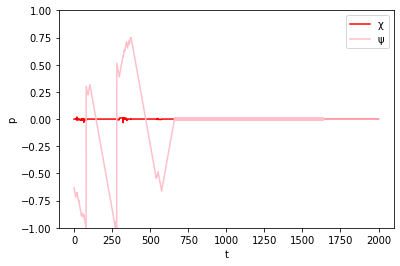

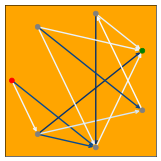

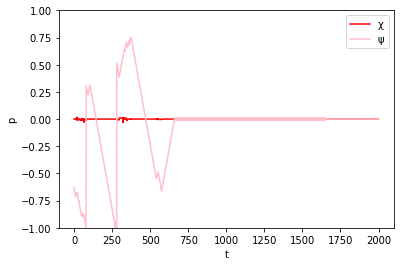

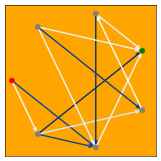

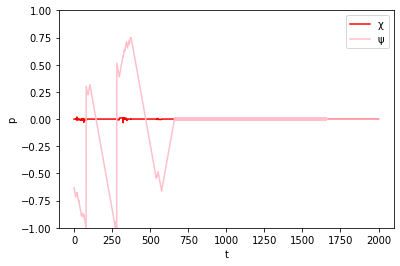

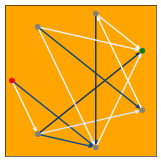

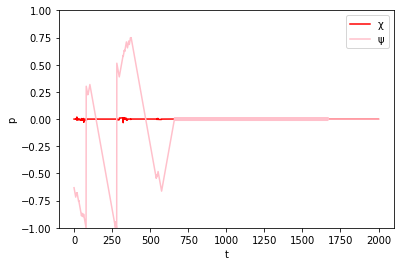

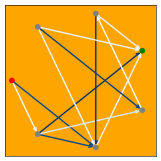

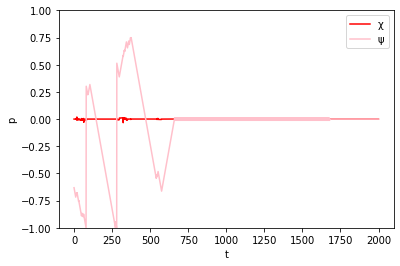

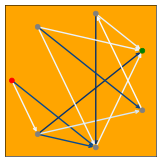

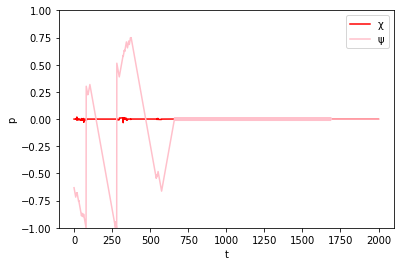

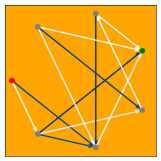

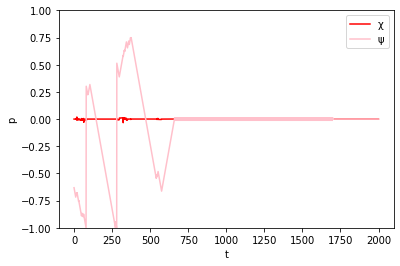

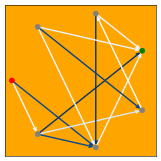

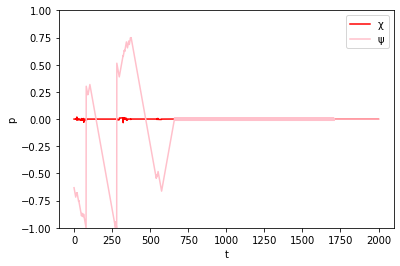

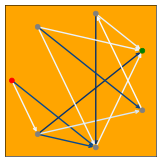

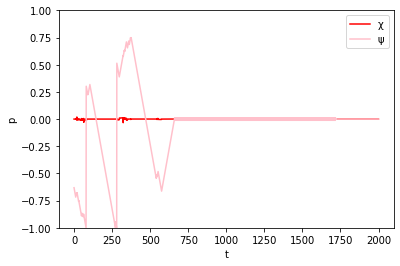

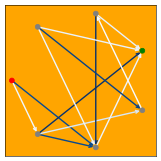

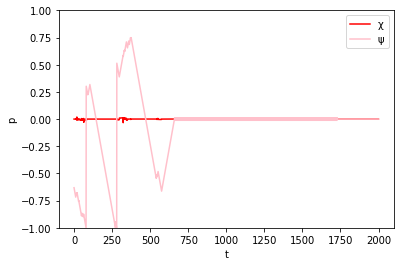

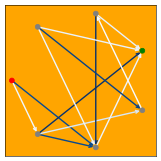

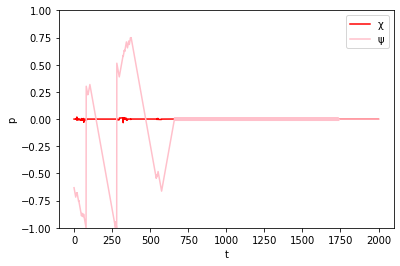

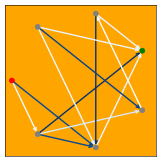

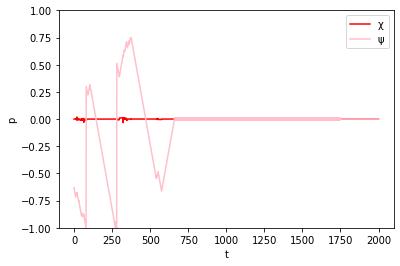

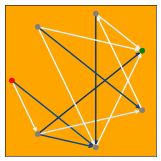

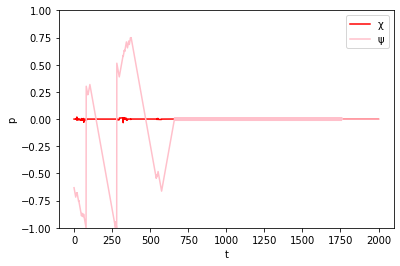

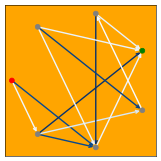

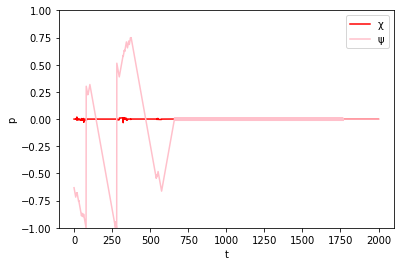

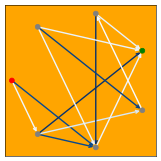

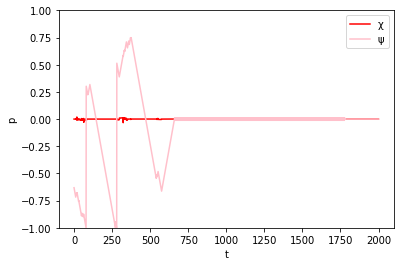

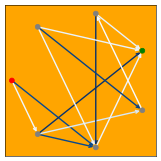

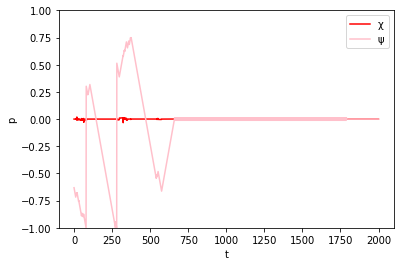

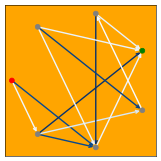

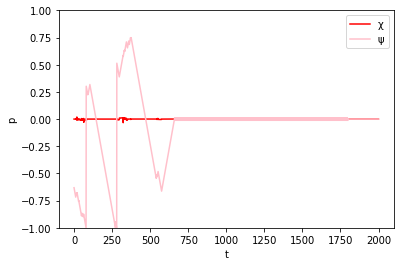

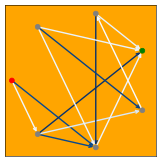

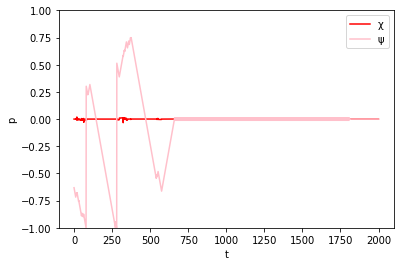

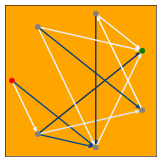

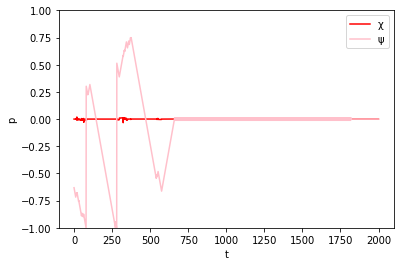

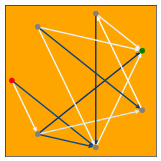

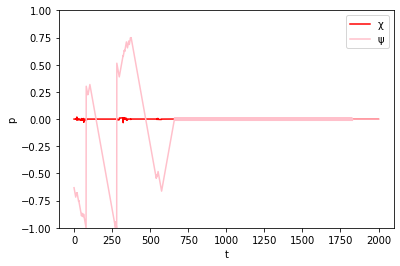

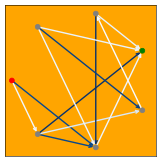

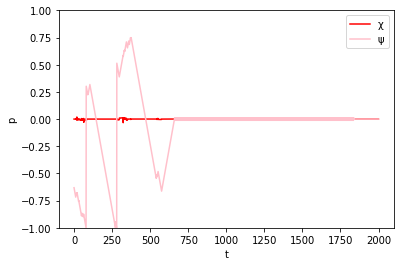

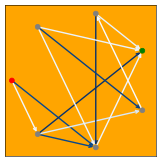

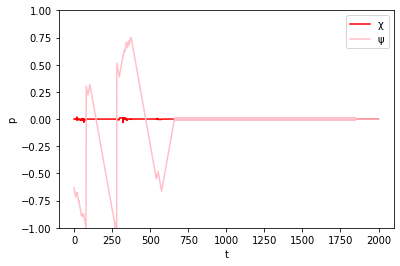

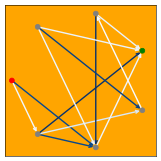

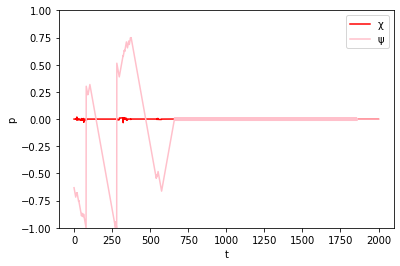

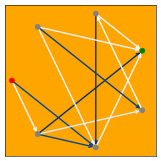

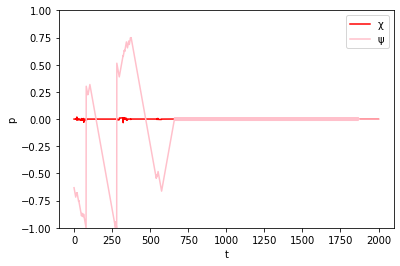

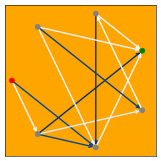

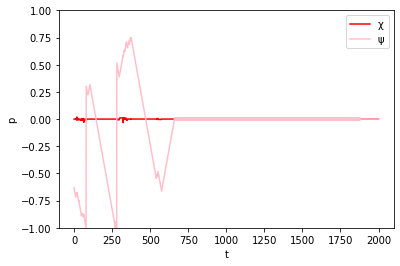

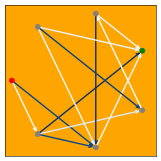

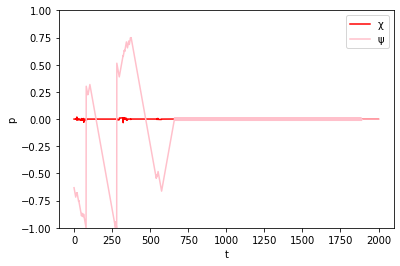

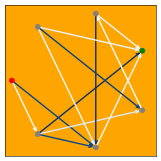

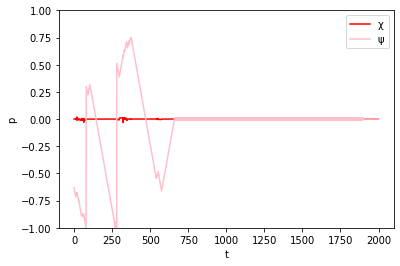

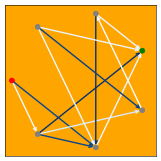

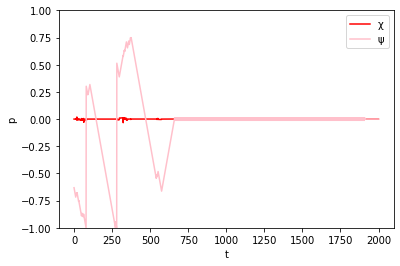

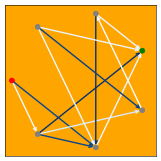

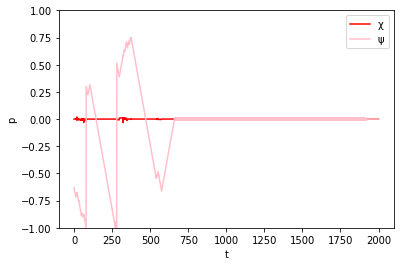

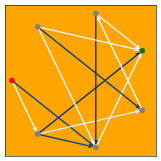

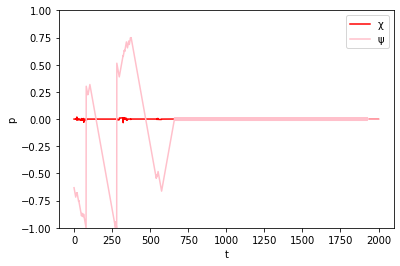

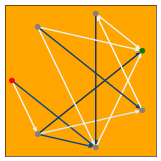

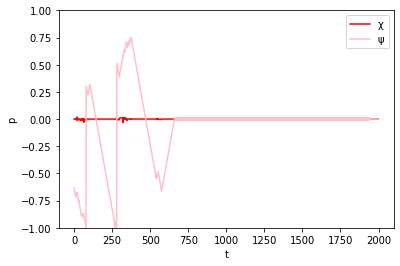

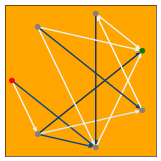

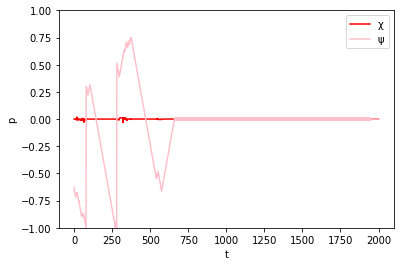

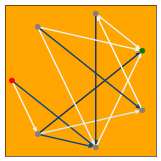

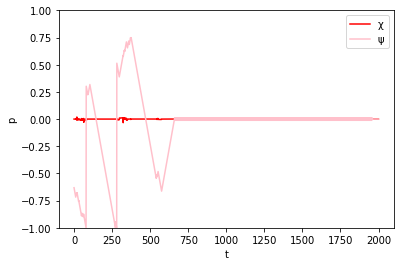

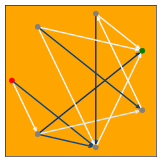

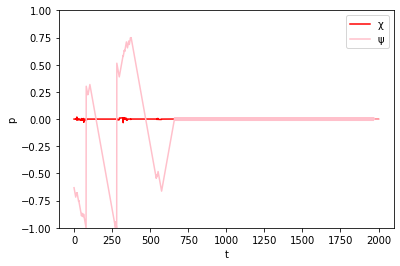

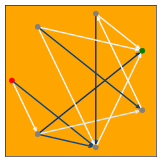

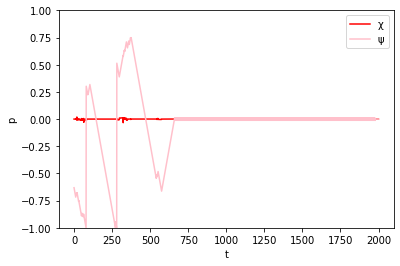

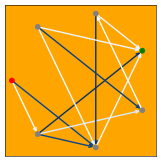

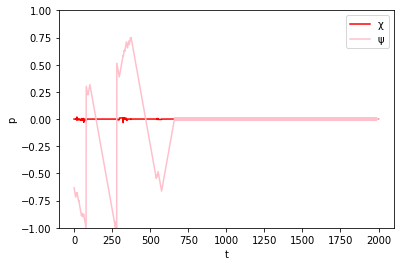

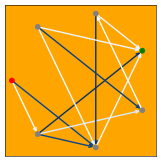

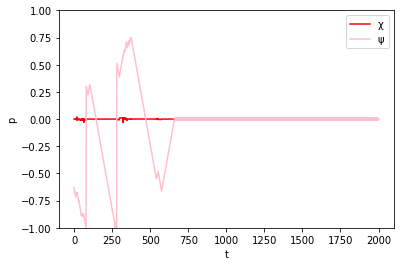

In [ ]:
#generate animation, very messy.
I_n = 1
H_n = 5
O_n = 1
n_nodes = I_n  + H_n + O_n
weights = [[0 for i in range(n_nodes)]for j in range(n_nodes)]
p = 0.1
s = 0.1
learning_rate = 0.05



out = []
inn = []
weightsrecord = []
a = 0
steps = 2000
dt =1
iterations = np.arange(0, steps, dt)


theta = np.zeros((1, n_nodes))


y = np.zeros((n_nodes, len(iterations))) #initialize y with zeroes


weightsrecord.append(sum([sum(weights[i]) for i in range(len(weights))]))
for t in np.arange(1, len(iterations)): #add hebb here, edge formation, fourier function and finally snake


#####################GAME
    inp = y[:, t-1][0] #game's output, network's input ψ
    inn.append(inp)
    if a != 0 and a != 255:
      if inp <= 0:
        b = -1
      if inp>0:
        b = 1
      a+=b
      a = a%256
    else:
      a = np.random.randint(0,255)
      b = np.random.choice((-1,1))
    out.append((a/255)*2-1)
    y[:, t-1][n_nodes-1] = (a/255)*2-1 #game's input, network's output χ
#########################

    # update activations
    delta = -y[:, t-1] + np.tanh(weights @ y[:, t-1] + theta)#@ is matrix multiplication, in this case between weight matrix and activations vector
    y[:, t] = y[:, t-1] + dt * (delta) #what does dt do? delta determines the change in activation. speaking of theta, it doesnt make sense for a neuron to have negative activity. if anything it should have negative weight.. 





    #weight update. changing from t to t-1 is not good. weights are a mess now 

    weightsrecord.append(sum([sum(weights[i]) for i in range(len(weights))])) #total neural activation
    for i in range(len(weights[0])):
      for j in range(len(weights)): #if weight[i][j] != 0


        #hebb
        if weights[i][j] != 0: #only if the two neurons are connected.  connections matter as they are unilateral
          weights[i][j] += y[:, t][i]*y[:, t-1][j]*learning_rate #since j connects to i, it causes i to change, but j at t hasnt reached i yet, so i should refer to j in the past (right?)
          weights[i][j] = np.tanh(weights[i][j])
          #activity fucking blows out of the roof in either direction. maybe add learning rate? lol?>?@??@
          #applying hebb multiple times leads to the entire system blowing out of proportion.  #should i add and delete edges at random?
        
        #bit of entropy 

        if t>0 and t<=100:
            if weights[i][j] == 0 and np.random.rand() < p:#will generate an edge with some probability p, going from strongest neuron to weakest 
              if y[:, t][i] > y[:, t-1][j]:
                weights[i][j] = np.random.uniform(-1,1)*s #should be low. this seems useful from high to low

              if y[:, t][i] < y[:, t-1][j]:
                weights[j][i] = np.random.uniform(-1,1)*s #should be low

            if weights[i][j] > -0.1 and weights[i][j] < 0.1 and np.random.rand() < p:#will delete an edge with some probability p 
                #pass
                weights[i][j] = 0
        
        if t>100: #random network initialization
          if abs(weightsrecord[t]) > abs(weightsrecord[t-1]):
            if weights[i][j] == 0 and np.random.rand() < p:#will generate an edge with some probability p, going from strongest neuron to weakest 
              if y[:, t][i] > y[:, t-1][j]:
                weights[i][j] = np.random.uniform(-1,1)*s #should be low

              if y[:, t][i] < y[:, t-1][j]:
                weights[j][i] = np.random.uniform(-1,1)*s #should be low

            if weights[i][j] > -0.1 and weights[i][j] < 0.1 and np.random.rand() < p:#will delete an edge with some probability p 
                #pass
                weights[i][j] = 0
        

        #formatting
        if weights[j][i] != 0 or i == j: #keep network directed, and with no self loops
          weights[i][j] = 0
        if j < I_n: 
          weights[i][j] = 0
        if i >= I_n+H_n:
          weights[i][j] = 0
        if j >= I_n+H_n and i < I_n:
          weights[i][j] = 0
        if j < I_n and i >= I_n+H_n:
          weights[i][j] = 0

          #plot
          if t%10 == 0:
            kkk = plt.figure()
            plt.ylim([-1,1])
            plt.ylabel('p')
            plt.xlabel('t')
            xx, =plt.plot(iterations, y[0, :],'r')
            yy, =plt.plot(iterations, y[n_nodes-1, :],'pink')
            plt.legend([xx,yy],['χ', 'ψ'])
            kkk.savefig(str(t)+'.png')
            
            connections = []
            weightlist = []
            for i in range(n_nodes):
              for j in range(n_nodes):
                if weights[i][j] != 0:
                  connections.append((i, j))
                  weightlist.append(weights[i][j])

            G = nx.DiGraph()
            G.add_nodes_from = [i for i in range(n_nodes)]
            G.add_edges_from(connections)


            fig = plt.figure(dpi = 50)
            ax = fig.add_subplot(111)
            ax.set_aspect(aspect=1)
            plt.ylim(-1.1,1.1)
            plt.xlim(-1.1,1.1)


            node_colors = ['grey' for node in G]
            if len(G.nodes)!=0:
              node_colors[np.where(np.array(list(G.nodes)) == n_nodes-1)[0][0]] = 'green'
            node_colors[0] = 'red'
            pos = nx.layout.shell_layout(G)
            M = G.number_of_edges()
            edge_colors = [i+0.5 for i in weightlist]

            nodes = nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors)
            edges = nx.draw_networkx_edges(
                G,
                pos,
                node_size=50,
                arrowstyle="->",
                arrowsize=10,
                edge_color=edge_colors,
                edge_cmap=plt.cm.Blues,
                width=2,
            )
            ax.set_facecolor('orange')
            plt.savefig(str(t)+'graph'+'.png')
            



# plot

_, ax = plt.subplots(1, 1)

plt.ylim([-1,1])
plt.ylabel('p')
plt.xlabel('t')
a, = ax.plot(iterations, y[0, :],'r')
b, =ax.plot(iterations, y[n_nodes-1, :],'pink')
plt.legend([a,b],['χ', 'ψ'])
plt.show()    

In [ ]:
len(G.nodes)

0

In [ ]:
list1 = [str(i)+'.png' for i in range(0, 2000,10)]
list1= list1[1:]
list2 = [str(i)+'graph.png' for i in range(0, 2000,10)]
list2= list2[1:]

In [ ]:
list2

In [ ]:
import imageio
images = []
for filename in list2:
    images.append(imageio.imread(filename))
imageio.mimsave('/content/sample_data/movie.gif', images)